#### **Data Augmentation using random cropping**

In [1]:
import os
import Augmentor

In [2]:
# Average image file per object = 1350
def augument_horizontal_flip(data_dir, label, out_dir, num_transformation=1):
    data_fp = os.path.join(data_dir, label)
    out_fp = os.path.join(out_dir, label)
    
    aug_pipeline = Augmentor.Pipeline(source_directory=data_fp, output_directory=out_fp)
    aug_pipeline.crop_random(probability=0.5, percentage_area=0.3)
    num_of_samples = int(1350+600)
    
    aug_pipeline.sample(num_of_samples)

In [3]:
folder_names = ['cassette_player', 'chain_saw', 'church', 'english_springer', 'french_horn', 'garbage_truck', 'gas_pump', 'golf_ball', 'parachute', 'tench']

In [4]:
data_dir = "dataset/"
out_dir = os.path.join(os.getcwd(), "dataset_crop_random")

In [5]:
for folder_name in folder_names:
    augument_horizontal_flip(data_dir=data_dir, label=folder_name, out_dir=out_dir)

Initialised with 1350 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_crop_random/cassette_player.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=L size=160x213 at 0x7F7868027A60>: 100%|████████████████████████████████████████████████████████████████| 1950/1950 [00:02<00:00, 801.37 Samples/s]


Initialised with 1250 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_crop_random/chain_saw.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=213x160 at 0x7F786811CAC0>: 100%|██████████████████████████████████████████████████████████████| 1950/1950 [00:03<00:00, 511.82 Samples/s]


Initialised with 1350 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_crop_random/church.

Processing <PIL.Image.Image image mode=RGB size=63x48 at 0x7F78684AA650>: 100%|██████████████████████████████████████████████████████████████████████████████████| 1950/1950 [00:03<00:00, 602.25 Samples/s]


Initialised with 1350 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_crop_random/english_springer.

Processing <PIL.Image.Image image mode=RGB size=72x48 at 0x7F786818DD50>: 100%|██████████████████████████████████████████████████████████████████████████████████| 1950/1950 [00:03<00:00, 529.74 Samples/s]


Initialised with 1350 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_crop_random/french_horn.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=213x160 at 0x7F78684CCFD0>: 100%|██████████████████████████████████████████████████████████████| 1950/1950 [00:03<00:00, 616.11 Samples/s]


Initialised with 1350 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_crop_random/garbage_truck.

Processing <PIL.Image.Image image mode=RGB size=63x48 at 0x7F78683FBD60>: 100%|██████████████████████████████████████████████████████████████████████████████████| 1950/1950 [00:03<00:00, 639.50 Samples/s]


Initialised with 1350 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_crop_random/gas_pump.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=160x213 at 0x7F7868309C30>: 100%|██████████████████████████████████████████████████████████████| 1950/1950 [00:03<00:00, 649.67 Samples/s]


Initialised with 1350 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_crop_random/golf_ball.

Processing <PIL.Image.Image image mode=RGB size=48x72 at 0x7F7868156380>: 100%|██████████████████████████████████████████████████████████████████████████████████| 1950/1950 [00:02<00:00, 780.51 Samples/s]


Initialised with 1350 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_crop_random/parachute.

Processing <PIL.Image.Image image mode=RGB size=63x48 at 0x7F78683C5090>: 100%|██████████████████████████████████████████████████████████████████████████████████| 1950/1950 [00:03<00:00, 566.97 Samples/s]


Initialised with 1350 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_crop_random/tench.

Processing <PIL.Image.Image image mode=RGB size=72x48 at 0x7F7868156C80>: 100%|██████████████████████████████████████████████████████████████████████████████████| 1950/1950 [00:03<00:00, 615.79 Samples/s]


#### **Mapping the dataset**

In [6]:
import os
from os import walk

import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
current_dir = os.path.abspath(os.getcwd())
data_path = "dataset_crop_random/" # Change the mapping directory
data_mapping = []

for (dirpath, dirnames, filenames) in walk(data_path):
    if filenames:
        label_name = dirpath.split("/")[-1]
        data_full_fp = [os.path.join(current_dir, dirpath, fname) for fname in filenames]
        
        for data_fp in data_full_fp:
            data_mapping.append([data_fp, label_name])

In [9]:
data_df = pd.DataFrame(data_mapping, columns=["filename", "label"])
data_df.head()

,filename,label
0,/home/sasmi/Desktop/Lakehead University/COMP-5...,chain_saw
1,/home/sasmi/Desktop/Lakehead University/COMP-5...,chain_saw
2,/home/sasmi/Desktop/Lakehead University/COMP-5...,chain_saw
3,/home/sasmi/Desktop/Lakehead University/COMP-5...,chain_saw
4,/home/sasmi/Desktop/Lakehead University/COMP-5...,chain_saw


In [10]:
labels_map = {
    'cassette_player': 0,
    'chain_saw': 1,
    'church': 2,
    'english_springer': 3,
    'french_horn': 4,
    'garbage_truck': 5,
    'gas_pump': 6,
    'golf_ball': 7,
    'parachute': 8,
    'tench': 9
}

In [11]:
train, test = train_test_split(data_df, 
                               test_size=0.2, 
                               stratify=data_df["label"], 
                               random_state=42)
print(train.shape)
print(test.shape)

(15600, 2)
(3900, 2)


In [12]:
train.to_csv(os.path.join(data_path, "train.csv"), index=False)
test.to_csv(os.path.join(data_path, "test.csv"), index=False)

#### **Modelling Using the Augmentated Data**

In [13]:
import os
import pandas as pd
from PIL import Image
from datetime import datetime

import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models

from imgaug import augmenters as iaa

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [14]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, labels_map, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_labels['label'] = self.img_labels['label'].map(labels_map)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = self.img_labels.iloc[idx, 0]
        image = Image.open(img_path).convert('RGB')
        
        label = torch.tensor(int(self.img_labels.iloc[idx, 1]), dtype=torch.uint8)
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

In [15]:
class ResNetModel(nn.Module):
    def __init__(self, num_classes):
        super(ResNetModel, self).__init__()
        self.resnet18 = models.resnet18(pretrained=False)
        self.resnet18.fc = nn.Linear(in_features=512, out_features=num_classes)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.resnet18(x)

In [16]:
def create_dir(dir_name):
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
        
    else:
        pass

In [17]:
def dump_model(training_id, model_dir, model):
    model_name = f"{training_id}_resnet18_od.pth"
    create_dir(dir_name=model_dir)
        
    model_dump_fp = os.path.join(model_dir, model_name)
    torch.save(model.state_dict(), model_dump_fp)

In [18]:
labels_map = {
    'cassette_player': 0,
    'chain_saw': 1,
    'church': 2,
    'english_springer': 3,
    'french_horn': 4,
    'garbage_truck': 5,
    'gas_pump': 6,
    'golf_ball': 7,
    'parachute': 8,
    'tench': 9
}

In [19]:
train_annotation_fp = "dataset_90_rotation/train.csv"
test_annotation_fp = "dataset_90_rotation/test.csv"

model_dir = "./models"
training_id = f"random_crop_{datetime.utcnow().timestamp()}" #change the training id

log_dir = os.path.join("./log_dir", training_id)
create_dir(log_dir)

In [20]:
# ResNet-18 expects input images of size (224, 224)
feature_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
])

train_dataset = CustomImageDataset(annotations_file=train_annotation_fp, 
                                   labels_map=labels_map,
                                   transform=feature_transform,
                                  )
test_dataset = CustomImageDataset(annotations_file=test_annotation_fp, 
                                  labels_map=labels_map,
                                  transform=feature_transform,
                                 )

# Define the DataLoader
batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [21]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([16, 3, 224, 224])
Labels batch shape: torch.Size([16])


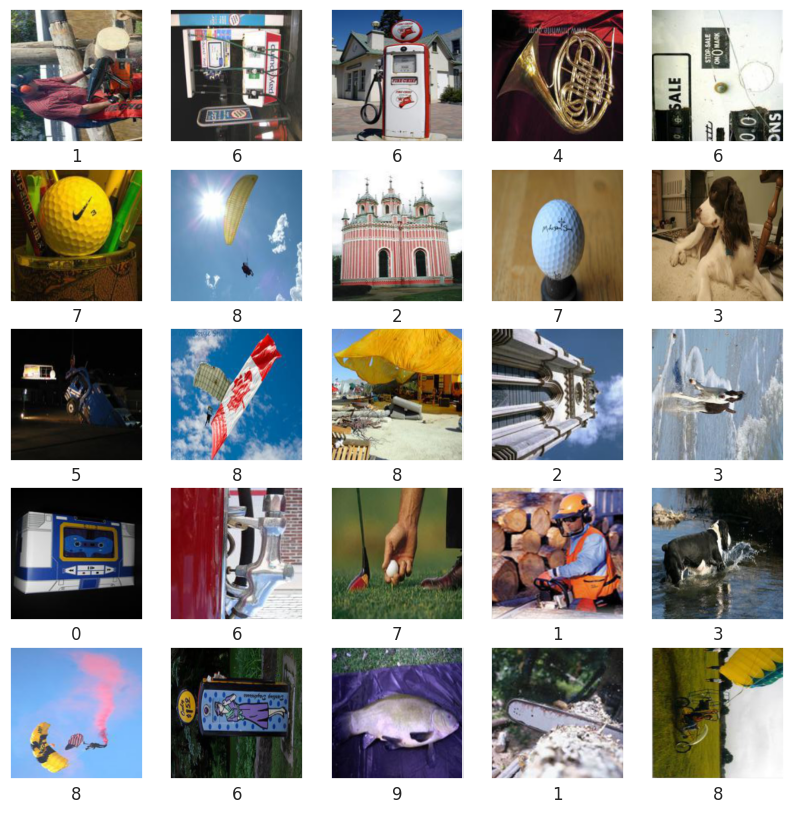

In [22]:
# Plotting some image samples from the dataloaders
plt.figure(figsize=(10,10))
for i in range(25):
    train_features, train_labels = next(iter(train_dataloader))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_features[0].numpy().transpose((1, 2, 0)))
    plt.xlabel(train_labels[0].tolist())
plt.show()

In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"
num_class = 10
learning_rate = 1e-03
num_epoch = 20
save_model = True

model = ResNetModel(num_classes=num_class)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

/home/sasmi/anaconda3/envs/jarvis/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sasmi/anaconda3/envs/jarvis/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [24]:
model.train()
model.to(device)

epoch_ls, total_loss, total_accuracy = [], [], []

for epoch in range(num_epoch):

    loss_train, acc_train = 0, 0
    total_samples = 0
    
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # calculate the loss and accuracy
        loss_train += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        acc_train += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        
        loss.backward()
        optimizer.step()
    
    epoch_loss = loss_train / len(train_dataloader)
    epoch_accuracy = acc_train / total_samples
    
    epoch_ls.append(epoch)
    total_loss.append(epoch_loss)
    total_accuracy.append(epoch_accuracy)
    
    print(f"Current epoch: {epoch} | Training Accuracy: {epoch_accuracy} | Training Loss: {epoch_loss}")
    
if save_model:
    dump_model(training_id, model_dir, model)

Current epoch: 0 | Training Accuracy: 0.3655128205128205 | Training Loss: 1.8137876160328206
Current epoch: 1 | Training Accuracy: 0.49756410256410255 | Training Loss: 1.4771238746398534
Current epoch: 2 | Training Accuracy: 0.5792307692307692 | Training Loss: 1.2603354205229345
Current epoch: 3 | Training Accuracy: 0.6276923076923077 | Training Loss: 1.1181131818355659
Current epoch: 4 | Training Accuracy: 0.661923076923077 | Training Loss: 1.012038070391386
Current epoch: 5 | Training Accuracy: 0.6938461538461539 | Training Loss: 0.9213204689209278
Current epoch: 6 | Training Accuracy: 0.7228205128205129 | Training Loss: 0.8361886899746381
Current epoch: 7 | Training Accuracy: 0.7466025641025641 | Training Loss: 0.7513784744342168
Current epoch: 8 | Training Accuracy: 0.7798717948717949 | Training Loss: 0.6589620547416882
Current epoch: 9 | Training Accuracy: 0.8137820512820513 | Training Loss: 0.5640761756973389
Current epoch: 10 | Training Accuracy: 0.8430769230769231 | Training Lo

In [25]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
test_acc = 100 * correct // total
print(f'Test Accuracy: {test_acc}%')

Test Accuracy: 76%


In [26]:
train_metrics_df = pd.DataFrame(zip(epoch_ls, total_loss, total_accuracy), columns=["epoch", "loss", "accuracy"])
train_metrics_df.to_csv(f"{os.path.join(log_dir, 'training_metrics.csv')}", index=False)
train_metrics_df

,epoch,loss,accuracy
0,0,1.813788,0.365513
1,1,1.477124,0.497564
2,2,1.260335,0.579231
3,3,1.118113,0.627692
4,4,1.012038,0.661923
5,5,0.921320,0.693846
6,6,0.836189,0.722821
7,7,0.751378,0.746603
8,8,0.658962,0.779872
9,9,0.564076,0.813782


In [27]:
test_acc = 100 * correct // total

In [28]:
test_metrics_df = pd.DataFrame([test_acc], columns=["accuracy"])
test_metrics_df.to_csv(f"{os.path.join(log_dir, 'test_metrics.csv')}", index=False)
test_metrics_df

,accuracy
0,76


<Axes: xlabel='epoch', ylabel='value'>

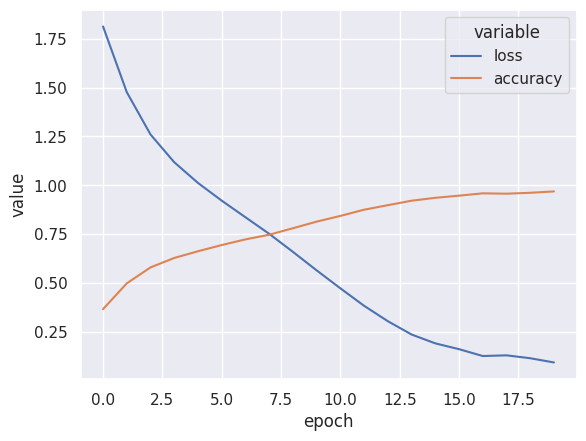

In [29]:
sns.lineplot(data=pd.melt(train_metrics_df, ["epoch"]), x="epoch", y="value", hue="variable")

### Deprecated Codes

In [ ]:
# img = train_features[0].numpy().transpose((1, 2, 0))
# label = train_labels[0]
# plt.imshow(img)
# plt.show()
# print(f"Label: {label}")